## 4.1 時間応答（伝達関数）

### 4.1.1 1次遅れ系

$$
K = \frac{1}{\mu},\  
T = \frac{M}{\mu}
$$

- $\mu$ が大きい、つまり速度に比例する摩擦が大きいほど、
  - 等速運動（出力が速度なのでこれが定常状態）に至った時の等速度が小さい
- 質量M が大きいほど、
  - 同じ外力（入力）に対して加速度が小さくなるので、定常状態（等速運動）の $1-e^{-1}=63.2\%$ に至るまでに時間がより長く掛かる

<TransferFunction>: sys[64]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    1
---------
0.5 s + 1

時定数:  0.5


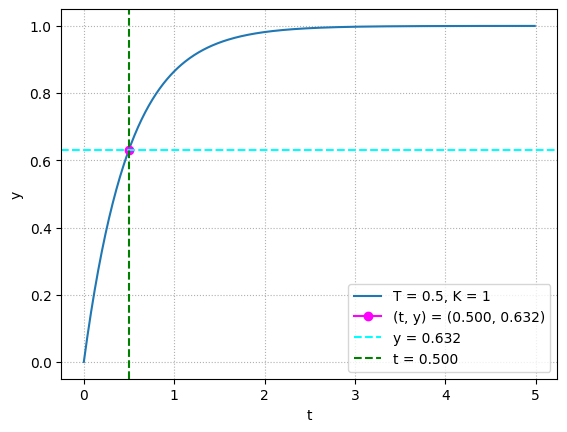

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import tf, step
from common import plot_set

T = 0.5 # 時定数
K = 1
P = tf([0, K], [T, 1]) # 1次遅れ系
print(P)
y, t = step(P, np.arange(0, 5, 0.01)) # ステップ応答

fig, ax = plt.subplots()
ax.plot(t, y, label=f'T = {T}, K = {K}')
plot_set(ax, 't', 'y')

# 時定数の計算
diff = np.abs(y - (1 - np.exp(-1)))
idx = np.argmin(diff)
print('時定数: ', t[idx])

ax.plot(t[idx], y[idx], color='magenta', marker='o', label='(t, y) = ({:.3f}, {:.3f})'.format(t[idx], y[idx]))
ax.axhline(y=y[idx], color='cyan', linestyle='--', label=f'y = {y[idx]:.3f}')
ax.axvline(x=t[idx], color='green', linestyle='--', label=f't = {t[idx]:.3f}')
ax.legend()
plt.show()

時定数: 1.000, ゲイン: 1, y: 0.632
時定数: 0.500, ゲイン: 1, y: 0.632
時定数: 0.100, ゲイン: 1, y: 0.632


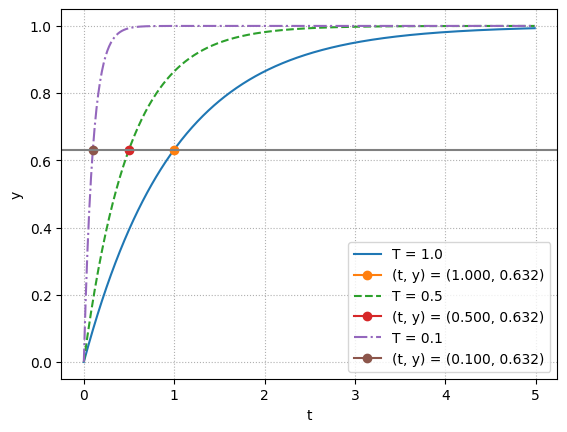

In [22]:
from common import linestyle_generator

LS = linestyle_generator()
fig, ax = plt.subplots()

K = 1
for T in [1.0, 0.5, 0.1]:
    y, t = step(tf([0, K], [T, 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, next(LS), label=f'T = {T}')
    # 時定数の計算
    diff = np.abs(y - K*(1 - np.exp(-1)))
    idx = np.argmin(diff)
    print(f'時定数: {t[idx]:.3f}, ゲイン: {K}, y: {y[idx]:.3f}')
    ax.plot(t[idx], y[idx], marker='o', label='(t, y) = ({:.3f}, {:.3f})'.format(t[idx], y[idx]))

plot_set(ax, 't', 'y', 'best')
ax.axhline(y=1-1/np.e, color='gray')
plt.show()

時定数: 0.500, ゲイン: 1, y: 0.632
時定数: 0.500, ゲイン: 2, y: 1.264
時定数: 0.500, ゲイン: 3, y: 1.896


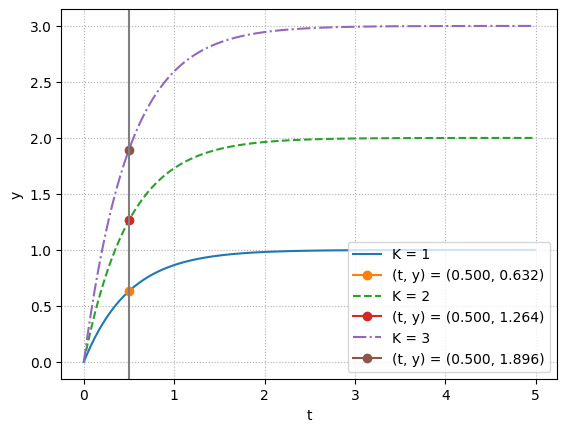

In [21]:
LS = linestyle_generator()
fig, ax = plt.subplots()

T = 0.5
for K in [1, 2, 3]:
    y, t = step(tf([0, K], [T, 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, next(LS), label=f'K = {K}')
    # 時定数の計算
    diff = np.abs(y - K*(1 - np.exp(-1)))
    idx = np.argmin(diff)
    print(f'時定数: {t[idx]:.3f}, ゲイン: {K}, y: {y[idx]:.3f}')
    ax.plot(t[idx], y[idx], marker='o', label='(t, y) = ({:.3f}, {:.3f})'.format(t[idx], y[idx]))

plot_set(ax, 't', 'y', 'lower right')
ax.axvline(x=T, color='gray')
plt.show()